## Sentimental Analysis of Social Media Data

In [1]:
import pandas as pd

In [28]:
replacers = {
    'dm': 'direct message',
    'thx': 'thanks',
    'dming': 'direct messaging',
    'dmed': 'direct messaged',
    'plz': 'please',
    'pls': 'please',
    'u': 'you',
    'asap': 'as soon as possible',
    '...': '',
    '. . .': '',
    'r': 'are',
    "what's": 'what is',
    "what're": 'what are',
    "who's": 'who is',
    "who're": 'who are',
    "where's": 'where is',
    "where're": 'where are',
    "when's": 'when is',
    "when're": 'when are',
    "how's": 'how is',
    "how're": 'how are',
    "i'm": 'i am',
    "we're": 'we are',
    "you're": 'you are',
    "they're": 'they are',
    "it's": 'it is',
    "he's": 'he is',
    "she's": 'she is',
    "that's": 'that is',
    "there's": 'there is',
    "there're": 'there are',
    "i've": 'i have',
    "we've": 'we have',
    "you've": 'you have',
    "they've": 'they have',
    "who've": 'who have',
    "would've": 'would have',
    "not've": 'not have',
    "i'll": 'i will',
    "we'll": 'we will',
    "you'll": 'you will',
    "he'll": 'he will',
    "she'll": 'she will',
    "it'll": 'it will',
    "they'll": 'they will',
    "isn't": 'is not',
    "wasn't": 'was not',
    "aren't": 'are not',
    "weren't": 'were not',
    "can't": 'can not',
    "couldn't": 'could not',
    "don't": 'do not',
    "didn't": 'did not',
    "shouldn't": 'should not',
    "wouldn't": 'would not',
    "doesn't": 'does not',
    "haven't": 'have not',
    "hasn't": 'has not',
    "hadn't": 'had not',
    "won't": 'will not',
    "you're": 'you are',
    '\s+': ' ',
    "\\n":'',
    }


In [144]:
with open('test.txt',  encoding="utf8") as f:
    lines = f.readlines()

In [145]:
df = pd.DataFrame(lines, columns=['tweets'])

In [146]:
df

,tweets
0,'Trump could not get Mexico to pay for shit! ...
1,"'@Rosemary_426 @ironpassivefist good tip',\n"
2,'When your MAGA friends are complaining about...
3,"'@cryolady Yes',\n"
4,"'@Richard77172284 You get the point',\n"
...,...
495,'Mark Meadows aid to testify today! Enjoy ev...
496,'Sergeant at Arms from Jan 6th is dead! What ...
497,'I have 1 word for the Surprise Jan 6th heari...
498,"""I bet Trump is shitting a brick over John Ea..."


In [147]:
df = df.tweets.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20960\2630179676.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.tweets.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))


In [149]:
df[1]

"'@Rosemary_426 @ironpassivefist good tip',"

In [141]:
from cleantext import clean

In [142]:
deemojifiesList = []
for tweet in df:
    tweet = re.sub(r'@([_A-Za-z0-9_]+)','username',tweet)
    tweet = re.sub(r'https://([A-Za-z0-9./]+)','url',tweet)
    tweet = re.sub('#', '', tweet)
    deemojifiesList.append(clean(tweet, no_emoji = True))

In [143]:
deemojifiesList

["'trump could not get mexico to pay for shit! but, joe biden just did!!!!!! retweet if you love joe! url',",
 "'username username good tip',",
 "'when your maga friends are complaining about gas prices, remind them of this! you might want to retweet! url',",
 "'username yes',",
 "'username you get the point',",
 "'username username username username username search me',",
 "'the gop is ok with having the police outgunned with assault weapons and forcing rape victims to give birth vote accordingly!',",
 "'trump and bannon treason on tape! url',",
 "'do you remember when trump went to saudi arabia and negotiated to have them cut oil production? joe biden is there now trying to reverse this please retweet for your maga friends url',",
 "'politicsgirl username is one of my favorite follows just fyi',",
 "'username and witnesses being intimidated via tweet during their impeachment testimony',",
 "'username you get the point',",
 "'username ask flynn',",
 '"i prefer us presidents that do no

In [117]:
l = '@rosemary_426 @ironpassivefist @_gunMans good tip'

In [118]:
l

'@rosemary_426 @ironpassivefist @_gunMans good tip'

In [119]:
import re
l = re.sub(r'@([_A-Za-z0-9_]+)','username',l)

In [153]:
df = pd.DataFrame(deemojifiesList, columns=['tweets'])

In [150]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [151]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [152]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [155]:
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

In [156]:
df

,tweets,Subjectivity,Polarity
0,'trump could not get mexico to pay for shit! b...,0.7,-0.164337
1,"'username username good tip',",0.6,0.700000
2,'when your maga friends are complaining about ...,0.0,0.000000
3,"'username yes',",0.0,0.000000
4,"'username you get the point',",0.0,0.000000
...,...,...,...
495,'mark meadows aid to testify today! enjoy ever...,0.5,0.500000
496,'sergeant at arms from jan 6th is dead! what t...,0.4,-0.250000
497,'i have 1 word for the surprise jan 6th hearin...,0.0,0.000000
498,"""i bet trump is shitting a brick over john eas...",0.0,0.000000


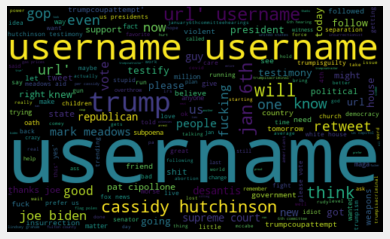

In [157]:
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [159]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,tweets,Subjectivity,Polarity,Analysis
0,'trump could not get mexico to pay for shit! b...,0.7,-0.164337,Negative
1,"'username username good tip',",0.6,0.700000,Positive
2,'when your maga friends are complaining about ...,0.0,0.000000,Neutral
3,"'username yes',",0.0,0.000000,Neutral
4,"'username you get the point',",0.0,0.000000,Neutral
...,...,...,...,...
495,'mark meadows aid to testify today! enjoy ever...,0.5,0.500000,Positive
496,'sergeant at arms from jan 6th is dead! what t...,0.4,-0.250000,Negative
497,'i have 1 word for the surprise jan 6th hearin...,0.0,0.000000,Neutral
498,"""i bet trump is shitting a brick over john eas...",0.0,0.000000,Neutral


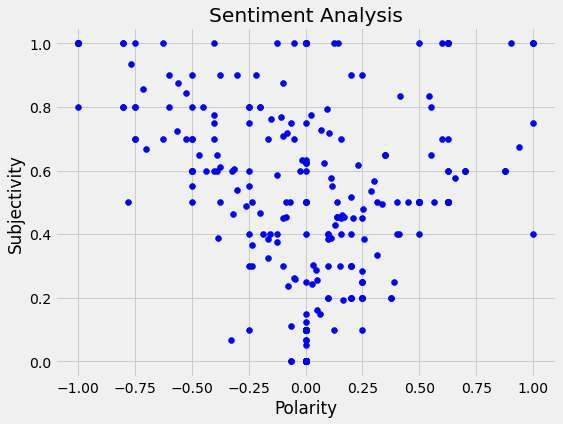

In [160]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()